In [ ]:
from google.colab import files
files.upload()

Saving Yearwise_Weather_Data_With_Condition.csv to Yearwise_Weather_Data_With_Condition.csv


{'Yearwise_Weather_Data_With_Condition.csv': b'STATE/UT,DISTRICT,YEAR,RAINFALL (mm),MIN TEMP (\xc2\xb0C),MAX TEMP (\xc2\xb0C),MONTH_NUM,MONTH_SIN,MONTH_COS,RAINFALL_LAG_1M,RAINFALL_LAG_1Y,HUMIDITY (%),DEW POINT (\xc2\xb0C),WEATHER CONDITION\nAndhra Pradesh,Chittoor,1950,232.28916666666666,13.091666666666667,25.358333333333334,6.5,-1.9070629087032778e-18,-4.625929269271486e-17,224.35,,72.95955305883737,7.68357727843414,Dry heat\nAndhra Pradesh,Chittoor,1951,219.92166666666665,14.475,26.208333333333332,6.5,-1.9070629087032778e-18,-4.625929269271486e-17,223.15666666666667,232.28916666666666,64.08768132289005,7.292536264578011,Clear skies\nAndhra Pradesh,Chittoor,1952,251.9625,14.6,27.541666666666668,6.5,-1.9070629087032778e-18,-4.625929269271486e-17,246.4225,219.92166666666665,68.06664712259487,8.213329424518975,Humid\nAndhra Pradesh,Chittoor,1953,112.315,15.6,26.333333333333332,6.5,-1.9070629087032778e-18,-4.625929269271486e-17,127.81,251.9625,66.6742239981671,8.934844799633419,Dry heat\

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Overall_Yearwise_Weather_Data.csv')

#Data PreProcessing :
###1.Removing null values
###2.Removing duplicate values
###3.Removing outliers
###4.Label Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATE/UT         1350 non-null   object 
 1   DISTRICT         1350 non-null   object 
 2   YEAR             1350 non-null   int64  
 3   RAINFALL (mm)    1350 non-null   float64
 4   MIN TEMP (¬∞C)    1350 non-null   float64
 5   MAX TEMP (¬∞C)    1350 non-null   float64
 6   MONTH_NUM        1350 non-null   float64
 7   MONTH_SIN        1350 non-null   float64
 8   MONTH_COS        1350 non-null   float64
 9   RAINFALL_LAG_1M  1350 non-null   float64
 10  RAINFALL_LAG_1Y  1332 non-null   float64
 11  HUMIDITY (%)     1350 non-null   float64
 12  DEW POINT (¬∞C)   1350 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 137.2+ KB


In [ ]:
df

STATE/UT  DISTRICT  YEAR  RAINFALL (mm)  MIN TEMP (¬∞C)  \
0     Andhra Pradesh  Chittoor  1950     232.289167      13.091667   
1     Andhra Pradesh  Chittoor  1951     219.921667      14.475000   
2     Andhra Pradesh  Chittoor  1952     251.962500      14.600000   
3     Andhra Pradesh  Chittoor  1953     112.315000      15.600000   
4     Andhra Pradesh  Chittoor  1954     219.857500      17.133333   
...              ...       ...   ...            ...            ...   
1345     West Bengal  Siliguri  2020     193.644167      15.691667   
1346     West Bengal  Siliguri  2021     179.906667      15.816667   
1347     West Bengal  Siliguri  2022     186.805000      17.133333   
1348     West Bengal  Siliguri  2023     198.600000      13.941667   
1349     West Bengal  Siliguri  2024     225.876667      15.125000   

      MAX TEMP (¬∞C)  MONTH_NUM     MONTH_SIN     MONTH_COS  RAINFALL_LAG_1M  \
0         25.358333        6.5 -1.907063e-18 -4.625929e-17       224.350000   
1         26.208333        6.5 -1.907063e-18 -4.625929e-17       223.156667   
2         27.541667        6.5 -1.907063e-18 -4.625929e-17       246.422500   
3         26.333333        6.5 -1.907063e-18 -4.625929e-17       127.810000   
4         31.016667        6.5 -1.907063e-18 -4.625929e-17       223.538333   
...             ...        ...           ...           ...              ...   
1345      29.041667        6.5 -1.907063e-18 -4.625929e-17       185.176667   
1346      29.125000        6.5 -1.907063e-18 -4.625929e-17       172.682500   
1347      29.041667        6.5 -1.907063e-18 -4.625929e-17       192.610000   
1348      26.250000        6.5 -1.907063e-18 -4.625929e-17       195.908333   
1349      26.458333        6.5 -1.907063e-18 -4.625929e-17       239.295833   

      RAINFALL_LAG_1Y  HUMIDITY (%)  DEW POINT (¬∞C)  
0                 NaN     72.959553        7.683577  
1          232.289167     64.087681        7.292536  
2          219.921667     68.066647        8.213329  
3          251.962500     66.674224        8.934845  
4          112.315000     70.479160       11.229165  
...               ...           ...             ...  
1345       151.184167     71.117392        9.915145  
1346       193.644167     69.277333        9.672133  
1347       179.906667     65.429122       10.219158  
1348       186.805000     70.945764        8.130820  
1349       198.600000     68.197438        8.764488  

[1350 rows x 13 columns]

In [ ]:
df.isnull().sum()

STATE/UT           0
DISTRICT           0
YEAR               0
RAINFALL (mm)      0
MIN TEMP (¬∞C)      0
MAX TEMP (¬∞C)      0
MONTH_NUM          0
MONTH_SIN          0
MONTH_COS          0
RAINFALL_LAG_1M    0
RAINFALL_LAG_1Y    0
HUMIDITY (%)       0
DEW POINT (¬∞C)     0
dtype: int64

In [ ]:
# prompt: fit the null values in the dataset

import numpy as np
# Fill numerical missing values with the mean
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical missing values with the mode
for col in df.select_dtypes(exclude=np.number):
    df[col] = df[col].fillna(df[col].mode()[0])


There are no null values hence there is no need to remove null values

In [ ]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values hence there is no need to remove duplicate values

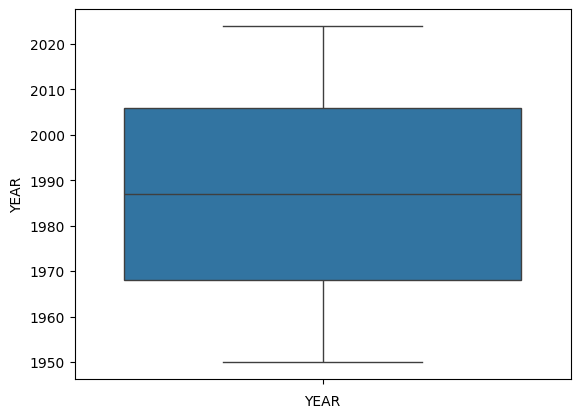

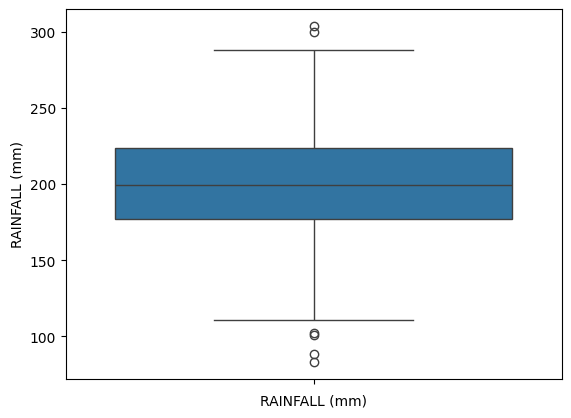

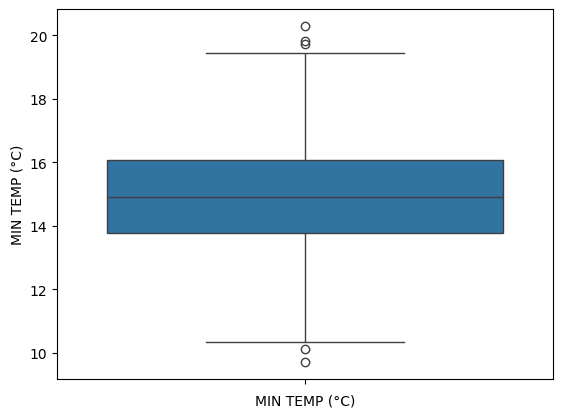

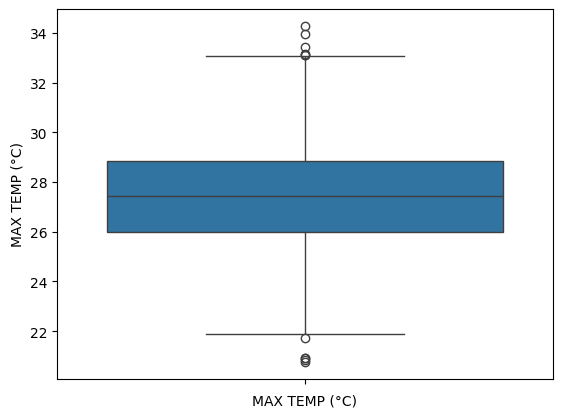

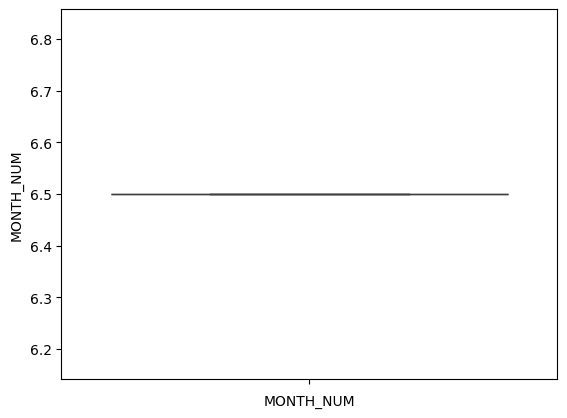

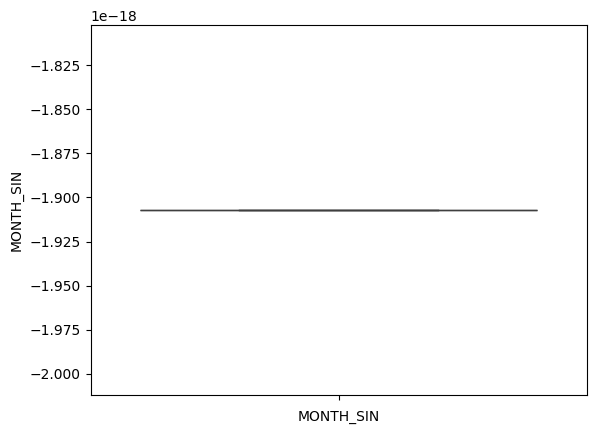

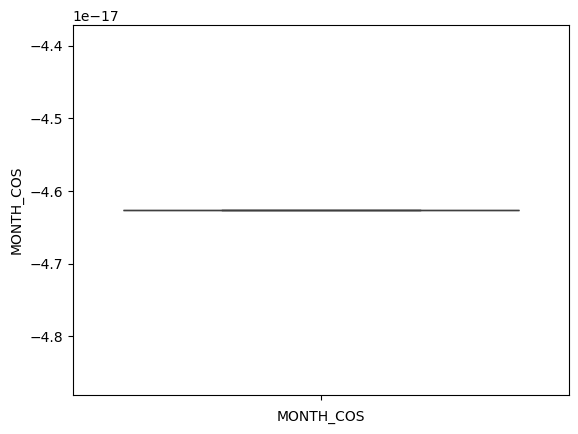

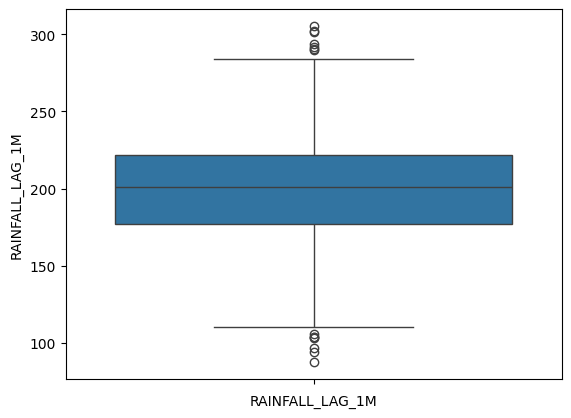

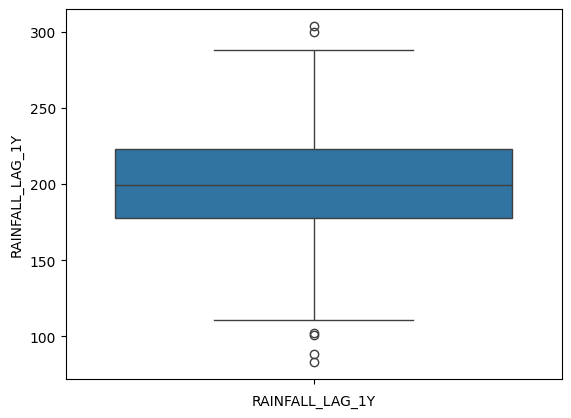

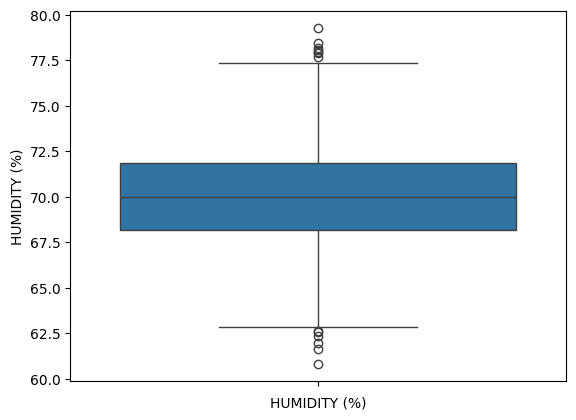

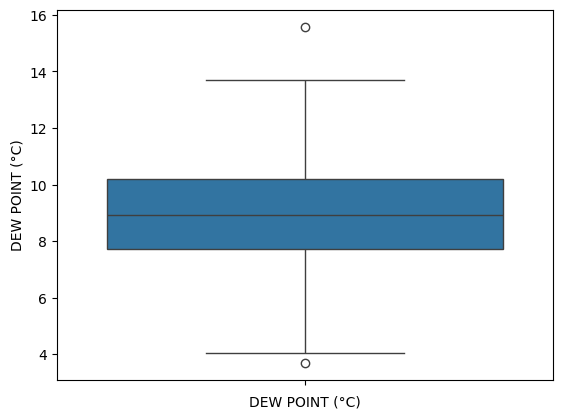

In [ ]:
# REMOVING OUTLIERS

for col in df.columns:
  if df[col].dtype !='object':
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()


In [ ]:
for col in df.columns:
  if df[col].dtype !='object':
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    Iqr=q3-q1
    lower_limit=q1-1.5*Iqr
    upper_limit=q3+1.5*Iqr
    df[col]=np.where(df[col]>upper_limit,upper_limit,np.where(df[col]<lower_limit,lower_limit,df[col]))

In [ ]:
df

STATE/UT  DISTRICT    YEAR  RAINFALL (mm)  MIN TEMP (¬∞C)  \
0     Andhra Pradesh  Chittoor  1950.0     232.289167      13.091667   
1     Andhra Pradesh  Chittoor  1951.0     219.921667      14.475000   
2     Andhra Pradesh  Chittoor  1952.0     251.962500      14.600000   
3     Andhra Pradesh  Chittoor  1953.0     112.315000      15.600000   
4     Andhra Pradesh  Chittoor  1954.0     219.857500      17.133333   
...              ...       ...     ...            ...            ...   
1345     West Bengal  Siliguri  2020.0     193.644167      15.691667   
1346     West Bengal  Siliguri  2021.0     179.906667      15.816667   
1347     West Bengal  Siliguri  2022.0     186.805000      17.133333   
1348     West Bengal  Siliguri  2023.0     198.600000      13.941667   
1349     West Bengal  Siliguri  2024.0     225.876667      15.125000   

      MAX TEMP (¬∞C)  MONTH_NUM     MONTH_SIN     MONTH_COS  RAINFALL_LAG_1M  \
0         25.358333        6.5 -1.907063e-18 -4.625929e-17       224.350000   
1         26.208333        6.5 -1.907063e-18 -4.625929e-17       223.156667   
2         27.541667        6.5 -1.907063e-18 -4.625929e-17       246.422500   
3         26.333333        6.5 -1.907063e-18 -4.625929e-17       127.810000   
4         31.016667        6.5 -1.907063e-18 -4.625929e-17       223.538333   
...             ...        ...           ...           ...              ...   
1345      29.041667        6.5 -1.907063e-18 -4.625929e-17       185.176667   
1346      29.125000        6.5 -1.907063e-18 -4.625929e-17       172.682500   
1347      29.041667        6.5 -1.907063e-18 -4.625929e-17       192.610000   
1348      26.250000        6.5 -1.907063e-18 -4.625929e-17       195.908333   
1349      26.458333        6.5 -1.907063e-18 -4.625929e-17       239.295833   

      RAINFALL_LAG_1Y  HUMIDITY (%)  DEW POINT (¬∞C)  
0          199.612299     72.959553        7.683577  
1          232.289167     64.087681        7.292536  
2          219.921667     68.066647        8.213329  
3          251.962500     66.674224        8.934845  
4          112.315000     70.479160       11.229165  
...               ...           ...             ...  
1345       151.184167     71.117392        9.915145  
1346       193.644167     69.277333        9.672133  
1347       179.906667     65.429122       10.219158  
1348       186.805000     70.945764        8.130820  
1349       198.600000     68.197438        8.764488  

[1350 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in df.columns:
  if df[col].dtype=="object":
    df[col]=le.fit_transform(df[col])

In [ ]:
df

STATE/UT  DISTRICT    YEAR  RAINFALL (mm)  MIN TEMP (¬∞C)  MAX TEMP (¬∞C)  \
0            0         2  1950.0     232.289167      13.091667      25.358333   
1            0         2  1951.0     219.921667      14.475000      26.208333   
2            0         2  1952.0     251.962500      14.600000      27.541667   
3            0         2  1953.0     112.315000      15.600000      26.333333   
4            0         2  1954.0     219.857500      17.133333      31.016667   
...        ...       ...     ...            ...            ...            ...   
1345         5        15  2020.0     193.644167      15.691667      29.041667   
1346         5        15  2021.0     179.906667      15.816667      29.125000   
1347         5        15  2022.0     186.805000      17.133333      29.041667   
1348         5        15  2023.0     198.600000      13.941667      26.250000   
1349         5        15  2024.0     225.876667      15.125000      26.458333   

      MONTH_NUM     MONTH_SIN     MONTH_COS  RAINFALL_LAG_1M  RAINFALL_LAG_1Y  \
0           6.5 -1.907063e-18 -4.625929e-17       224.350000       199.612299   
1           6.5 -1.907063e-18 -4.625929e-17       223.156667       232.289167   
2           6.5 -1.907063e-18 -4.625929e-17       246.422500       219.921667   
3           6.5 -1.907063e-18 -4.625929e-17       127.810000       251.962500   
4           6.5 -1.907063e-18 -4.625929e-17       223.538333       112.315000   
...         ...           ...           ...              ...              ...   
1345        6.5 -1.907063e-18 -4.625929e-17       185.176667       151.184167   
1346        6.5 -1.907063e-18 -4.625929e-17       172.682500       193.644167   
1347        6.5 -1.907063e-18 -4.625929e-17       192.610000       179.906667   
1348        6.5 -1.907063e-18 -4.625929e-17       195.908333       186.805000   
1349        6.5 -1.907063e-18 -4.625929e-17       239.295833       198.600000   

      HUMIDITY (%)  DEW POINT (¬∞C)  
0        72.959553        7.683577  
1        64.087681        7.292536  
2        68.066647        8.213329  
3        66.674224        8.934845  
4        70.479160       11.229165  
...            ...             ...  
1345     71.117392        9.915145  
1346     69.277333        9.672133  
1347     65.429122       10.219158  
1348     70.945764        8.130820  
1349     68.197438        8.764488  

[1350 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
df=pd.DataFrame(ss.fit_transform(df),columns=df.columns)

#PreProcessing is Done

#Lets Move towards Machine Learning Model Building

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

ml=RandomForestRegressor()
drop_cols_for_regression = [
    #'RAINFALL (mm)',     # üéØ This is your target, not a feature
    'STATE/UT',          # üó∫Ô∏è Categorical ‚Äî one-hot encode instead
    'DISTRICT',          # üèûÔ∏è Categorical ‚Äî one-hot encode instead
    'YEAR'               # üìÖ Keep only if doing trend modeling; drop for pure spatial model
]

d=df.drop(columns=drop_cols_for_regression)
X=d.drop('RAINFALL (mm)',axis=1)
Y=d['RAINFALL (mm)']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)
ml.fit(x_train,y_train)
y_pred=ml.predict(x_test)
acc=r2_score(y_test,y_pred)
print(round(acc*100,2))

81.63


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search=GridSearchCV(estimator=ml,param_grid=param_grid,cv=5,scoring='r2')
grid_search.fit(x_train,y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best R-squared Score:", grid_search.best_score_)

best_model=grid_search.best_estimator_
y_pred=best_model.predict(x_test)
acc=r2_score(y_test,y_pred)
print(f"Test R-squared Score: {round(acc*100,2)}")

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best R-squared Score: 0.8159046068995697
Test R-squared Score: 81.95


In [ ]:
Regressor_model_VarshaVaani=RandomForestRegressor(n_estimators=200,min_samples_split=10,max_depth=None)
Regressor_model_VarshaVaani.fit(x_train,y_train)
y_pred=Regressor_model_VarshaVaani.predict(x_test)
acc=r2_score(y_test,y_pred)
print(f"Test R-squared Score: {round(acc*100,2)}")

Test R-squared Score: 82.02


In [43]:
# prompt: save this ml model using pickle as .pkl file which i can download

import pickle
from google.colab import files

# Assuming 'Regressor_model_VarshaVaani' is your trained model

# Save the model to a file
with open('Regressor_model_VarshaVaani.pkl', 'wb') as file:
    pickle.dump(Regressor_model_VarshaVaani, file)

# Download the saved model
files.download('Regressor_model_VarshaVaani.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Now its time for classification Model

In [39]:
# prompt: Do data preproceesing for new uploaded dataset

import pandas as pd
import numpy as np
# Assuming the uploaded file is named 'new_data.csv'
# Replace 'new_data.csv' with the actual filename if different
df_new = pd.read_csv('Yearwise_Weather_Data_With_Condition.csv')

# Data Preprocessing for the new dataset

# 1. Handling Missing Values
for col in df_new.select_dtypes(include=np.number):
    df_new[col] = df_new[col].fillna(df_new[col].mean())

for col in df_new.select_dtypes(exclude=np.number):
    df_new[col] = df_new[col].fillna(df_new[col].mode()[0])

# 2. Removing Duplicates (if any)
df_new.drop_duplicates(inplace=True)

# 3. Outlier Removal
for col in df_new.columns:
    if df_new[col].dtype != 'object':
        q1 = df_new[col].quantile(0.25)
        q3 = df_new[col].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr
        df_new[col] = np.where(df_new[col] > upper_limit, upper_limit,
                              np.where(df_new[col] < lower_limit, lower_limit, df_new[col]))

# 4. Label Encoding
le = LabelEncoder()
for col in df_new.columns:
    if df_new[col].dtype == "object":
        df_new[col] = le.fit_transform(df_new[col])
# prompt: Do data preproceesing for new uploaded dataset

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Assuming the uploaded file is named 'new_data.csv'
# Replace 'new_data.csv' with the actual filename if different
df_new = pd.read_csv('Yearwise_Weather_Data_With_Condition.csv')

# Data Preprocessing for the new dataset

# 1. Handling Missing Values
for col in df_new.select_dtypes(include=np.number):
    df_new[col] = df_new[col].fillna(df_new[col].mean())

for col in df_new.select_dtypes(exclude=np.number):
    df_new[col] = df_new[col].fillna(df_new[col].mode()[0])

# 2. Removing Duplicates (if any)
df_new.drop_duplicates(inplace=True)

# 3. Outlier Removal
for col in df_new.columns:
    if df_new[col].dtype != 'object':
        q1 = df_new[col].quantile(0.25)
        q3 = df_new[col].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr
        df_new[col] = np.where(df_new[col] > upper_limit, upper_limit,
                              np.where(df_new[col] < lower_limit, lower_limit, df_new[col]))

# 4. Label Encoding
le = LabelEncoder()
for col in df_new.columns:
    if df_new[col].dtype == "object":
        df_new[col] = le.fit_transform(df_new[col])


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ml=RandomForestClassifier()
drop_cols_for_classification = [
    'WEATHER CONDITION',  # üéØ This is your classification target
    'STATE/UT',           # üó∫Ô∏è Categorical ‚Äî encode it
    'DISTRICT',           # üèûÔ∏è Categorical ‚Äî encode it
    'YEAR'                # üìÖ Optional; keep if you want temporal trends
]

d=df_new.drop(columns=drop_cols_for_regression)
X=d
Y=df_new['WEATHER CONDITION']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)
ml.fit(x_train,y_train)
y_pred=ml.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(round(acc*100,2))

90.74


In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search=GridSearchCV(estimator=ml,param_grid=param_grid,cv=5,scoring='r2')
grid_search.fit(x_train,y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best accuracy Score:", grid_search.best_score_)

best_model=grid_search.best_estimator_
y_pred=best_model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy Score: {round(acc*100,2)}")

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best accuracy Score: 0.9760429367752996
Accuracy Score: 92.22


In [46]:
classifier_model=RandomForestClassifier(n_estimators=50,max_depth=None,min_samples_split=5)
classifier_model.fit(x_train,y_train)
y_pred=classifier_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9259259259259259


In [47]:
import pickle

with open('Classifier_model_VarshaVaani.pkl','wb') as file :
  pickle.dump(classifier_model,file)

files.download('Classifier_model_VarshaVaani.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>